In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o dataset
file_path = './songs_normalize.csv'
df = pd.read_csv(file_path)
print(df.head())

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

In [58]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
missing_values_count = df.isnull().sum(axis=1)
rows_with_missing_values = missing_values_count[missing_values_count > 0].count()
print('Linhas com algum atributo faltante', rows_with_missing_values)
print(missing_values)

Linhas com algum atributo faltante 0
artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


In [59]:
# categorizando a duração
df['duration_category'] = pd.qcut(df['duration_ms'], 5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
df = df.drop(columns=['duration_ms'])
df.head()


,artist,song,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_category
0,Britney Spears,Oops!...I Did It Again,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,Short
1,blink-182,All The Small Things,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",Very Short
2,Faith Hill,Breathe,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",Long
3,Bon Jovi,It's My Life,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",Medium
4,*NSYNC,Bye Bye Bye,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,Short


<Figure size 1400x800 with 0 Axes>

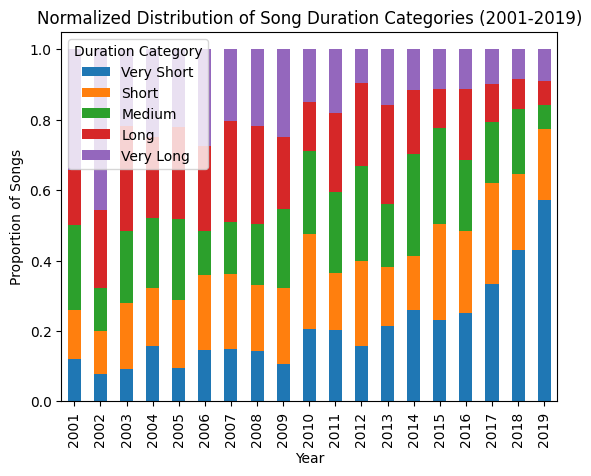

In [60]:
# Filter the dataset for the years between 2001 and 2019
filtered_songs_df = df[(df['year'] >= 2001) & (df['year'] <= 2019)]

# Group by year and duration_category, then count the number of songs in each category per year
duration_distribution = filtered_songs_df.groupby(['year', 'duration_category']).size().unstack()

# Normalize the counts to get proportions
duration_distribution_normalized = duration_distribution.div(duration_distribution.sum(axis=1), axis=0)

# Plotting the normalized stacked bar chart
plt.figure(figsize=(14, 8))
duration_distribution_normalized.plot(kind='bar', stacked=True)
plt.title('Normalized Distribution of Song Duration Categories (2001-2019)')
plt.xlabel('Year')
plt.ylabel('Proportion of Songs')
plt.legend(title='Duration Category')
plt.show()

In [61]:

genre_split = df['genre'].str.split(', ')
genre_exploded = genre_split.explode()

# Count the number of songs for each genre
genre_counts = genre_exploded.value_counts()
genre_counts

genre
pop                  1633
hip hop               778
R&B                   452
Dance/Electronic      390
rock                  234
metal                  66
latin                  64
set()                  22
country                21
Folk/Acoustic          20
World/Traditional      10
easy listening          7
blues                   4
jazz                    2
classical               1
Name: count, dtype: int64

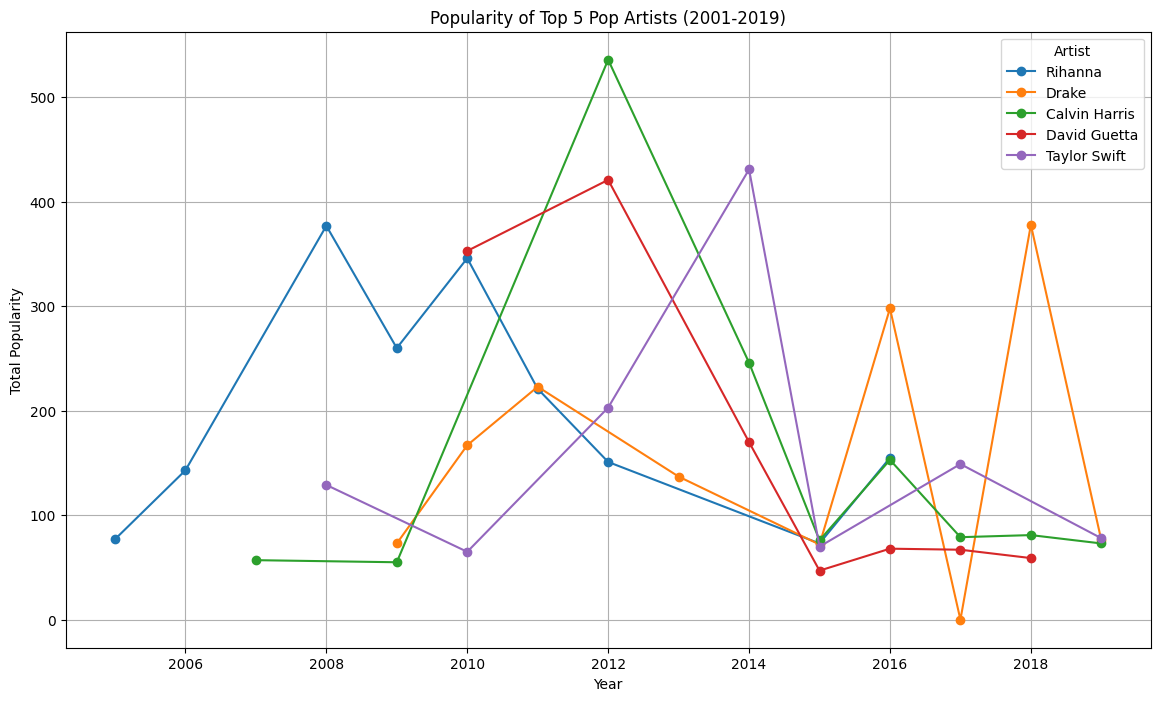

In [62]:
# Filter the dataset for pop songs and for the years between 2001 and 2019
filtered_songs_df = df[(df['genre'].str.contains('pop', case=False)) & (df['year'] >= 2001) & (df['year'] <= 2019)]

# Calculate the total popularity for each artist
artist_popularity = filtered_songs_df.groupby('artist')['popularity'].sum()

# Identify the top 5 most popular artists
top_artists = artist_popularity.nlargest(5).index

# Filter the dataset to include only the top 5 artists
top_artists_df = filtered_songs_df[filtered_songs_df['artist'].isin(top_artists)]

# Plot the popularity of these top 5 artists over the years
plt.figure(figsize=(14, 8))
for artist in top_artists:
    artist_data = top_artists_df[top_artists_df['artist'] == artist]
    yearly_popularity = artist_data.groupby('year')['popularity'].sum()
    plt.plot(yearly_popularity.index, yearly_popularity.values, marker='o', label=artist)

plt.title('Popularity of Top 5 Pop Artists (2001-2019)')
plt.xlabel('Year')
plt.ylabel('Total Popularity')
plt.legend(title='Artist')
plt.grid(True)
plt.show()

In [63]:
# Remover linhas com valores ausentes
initial_row_count = df.shape[0]
df_clean = df.dropna()
final_row_count = df_clean.shape[0]
removed_rows = initial_row_count - final_row_count
print(f'Foram removidas {removed_rows} linhas')

Foram removidas 0 linhas


In [64]:
# Remover coluna id pois não é relevante
df_clean = df_clean.drop(columns=['id'])

KeyError: "['id'] not found in axis"

In [ ]:
# Verificar valores ausentes
missing_values = df_clean.isnull().sum()
print(missing_values)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# Categorizar o atributo 'age'
bins = [0, 12, 18, 24, 59, float('inf')]
labels = ['criança', 'adolescente', 'jovem-adulto', 'adulto', 'idoso']
df_clean['age'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

# Categorizar o atributo 'avg_glucose_level'
bins = [0, 70, 100, 125, float('inf')]
labels = ['baixo', 'normal', 'pre-diabetes', 'diabetes']
df_clean['avg_glucose_level'] = pd.cut(df_clean['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Categorizar o atributo 'bmi'
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
labels = ['abaixo-do-peso', 'peso-normal', 'sobrepeso', 'obesidade1', 'obesidade2', 'obesidade3']
df_clean['bmi'] = pd.cut(df_clean['bmi'], bins=bins, labels=labels, right=False)

df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,idoso,0,1,Yes,Private,Urban,diabetes,obesidade2,formerly smoked,1
2,Male,idoso,0,1,Yes,Private,Rural,pre-diabetes,obesidade1,never smoked,1
3,Female,adulto,0,0,Yes,Private,Urban,diabetes,obesidade1,smokes,1
4,Female,idoso,1,0,Yes,Self-employed,Rural,diabetes,peso-normal,never smoked,1
5,Male,idoso,0,0,Yes,Private,Urban,diabetes,sobrepeso,formerly smoked,1


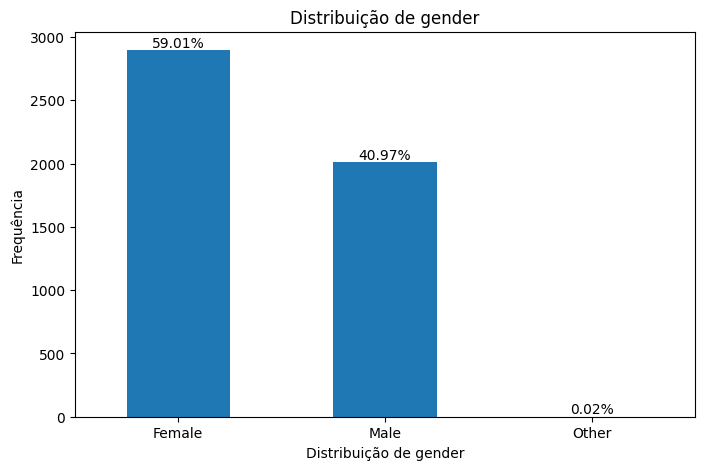

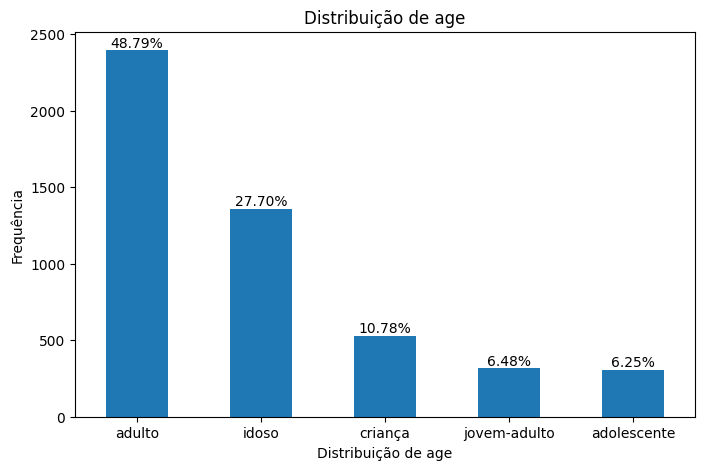

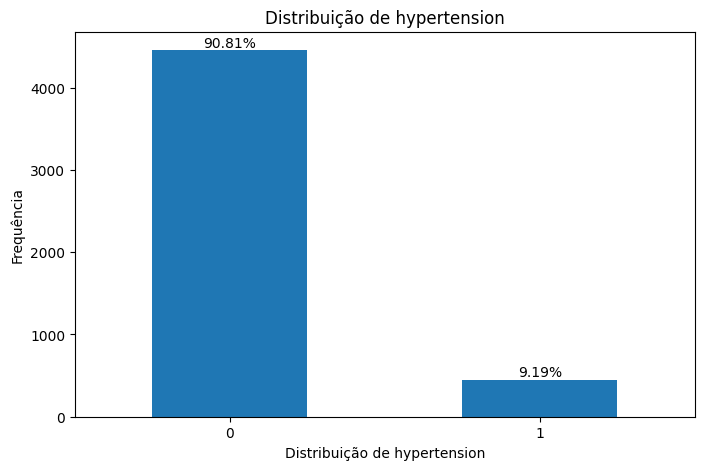

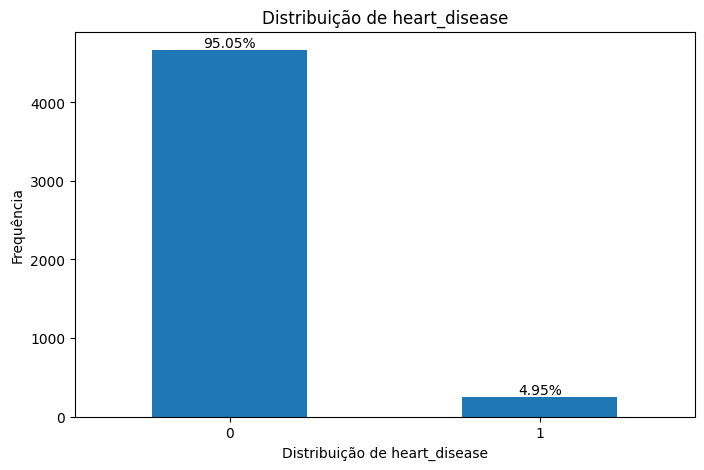

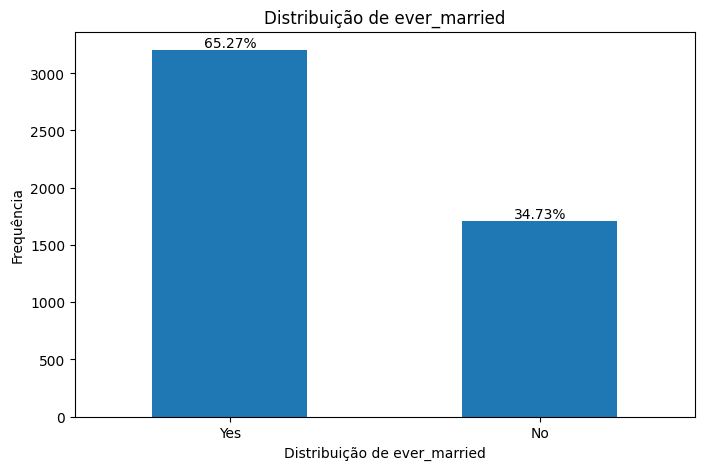

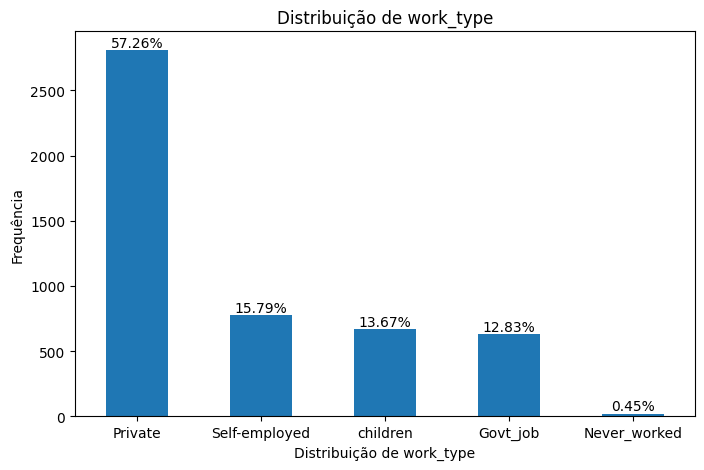

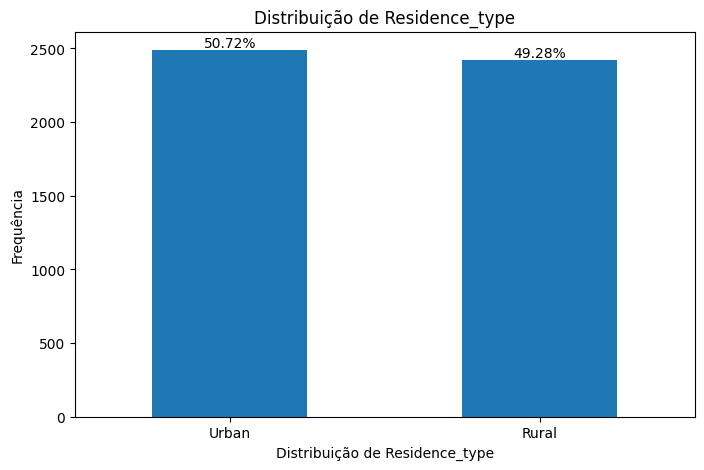

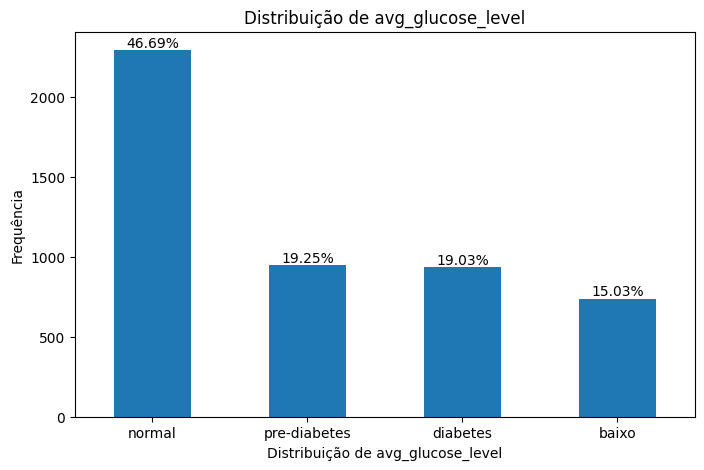

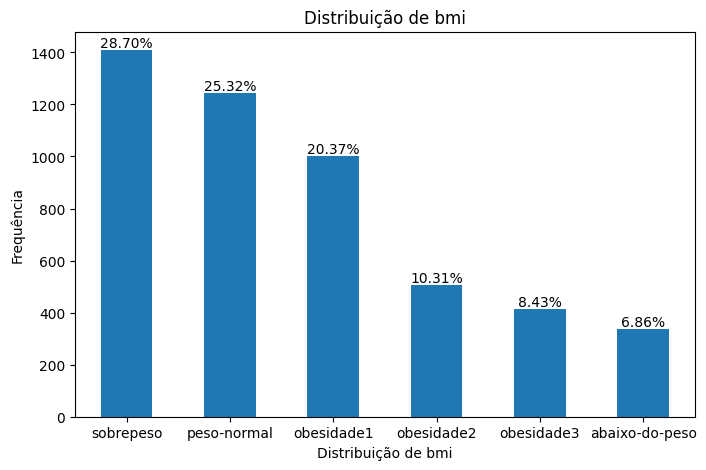

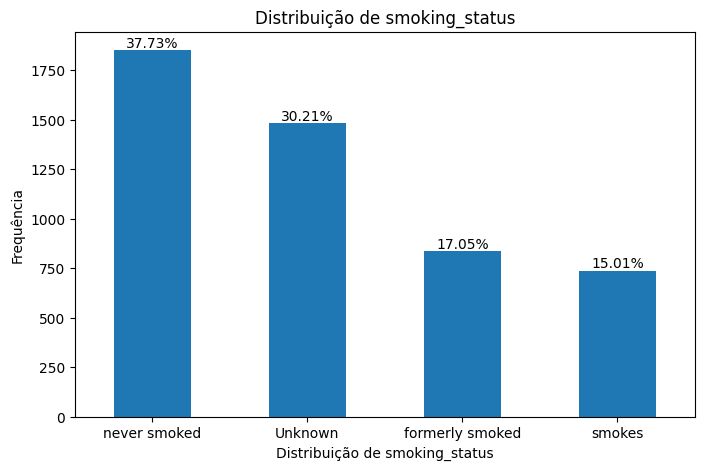

In [ ]:
def show_dist_of(attribute, df, title='', rotate=True):
    # Calcular a contagem de valores e a porcentagem
    temp_value_counts = df[attribute].value_counts()
    temp_percentages = (temp_value_counts / temp_value_counts.sum()) * 100

    # Plotar o gráfico de barras
    plt.figure(figsize=(8, 5))
    bars = temp_value_counts.plot(kind='bar')

    # Adicionar as porcentagens em cima de cada barra
    for bar, percentage in zip(bars.patches, temp_percentages):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # posição x
            bar.get_height(),                   # posição y
            f'{percentage:.2f}%',               # texto
            ha='center',                        # alinhamento horizontal
            va='bottom'                         # alinhamento vertical
        )

    plt.title(f'Distribuição de {title}' if title else f'Distribuição de {attribute}')
    plt.xlabel(title if title else f'Distribuição de {attribute}')
    plt.ylabel('Frequência')
    if rotate:
        plt.xticks(rotation=0)
    plt.show()

attributes = df_clean.columns.to_list().copy()

attributes.pop() # remover 'stroke'

for attr in attributes:
    show_dist_of(attr, df_clean)

In [ ]:
# Remover colunas com baixa variabilidade
df_clean = df_clean.drop(columns=['heart_disease'])

In [ ]:
df_clean.head(n=10)

,gender,age,hypertension,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,idoso,0,Yes,Private,Urban,diabetes,obesidade2,formerly smoked,1
2,Male,idoso,0,Yes,Private,Rural,pre-diabetes,obesidade1,never smoked,1
3,Female,adulto,0,Yes,Private,Urban,diabetes,obesidade1,smokes,1
4,Female,idoso,1,Yes,Self-employed,Rural,diabetes,peso-normal,never smoked,1
5,Male,idoso,0,Yes,Private,Urban,diabetes,sobrepeso,formerly smoked,1
6,Male,idoso,1,Yes,Private,Rural,normal,sobrepeso,never smoked,1
7,Female,idoso,0,No,Private,Urban,normal,peso-normal,never smoked,1
9,Female,idoso,0,Yes,Private,Urban,baixo,peso-normal,Unknown,1
10,Female,idoso,1,Yes,Private,Rural,normal,sobrepeso,never smoked,1
11,Female,idoso,0,Yes,Govt_job,Rural,pre-diabetes,obesidade2,smokes,1


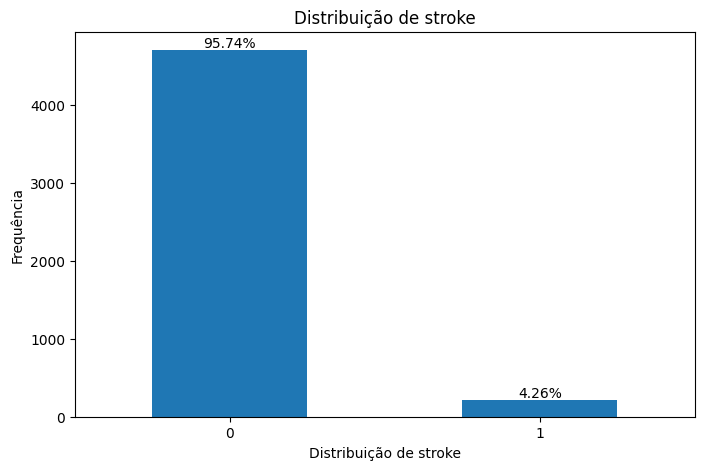

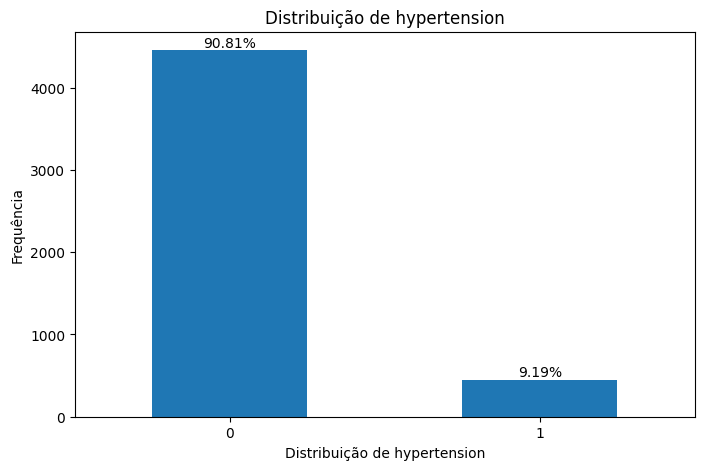

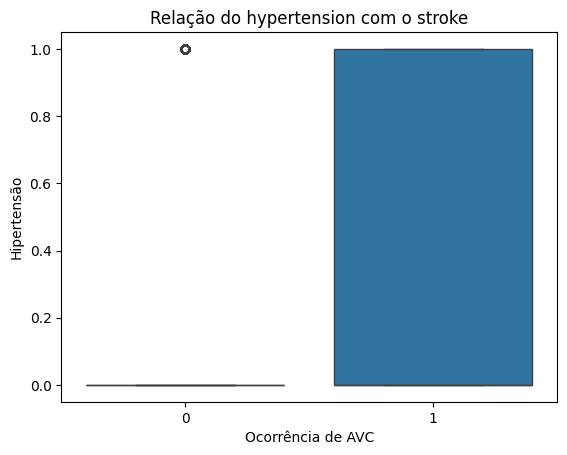

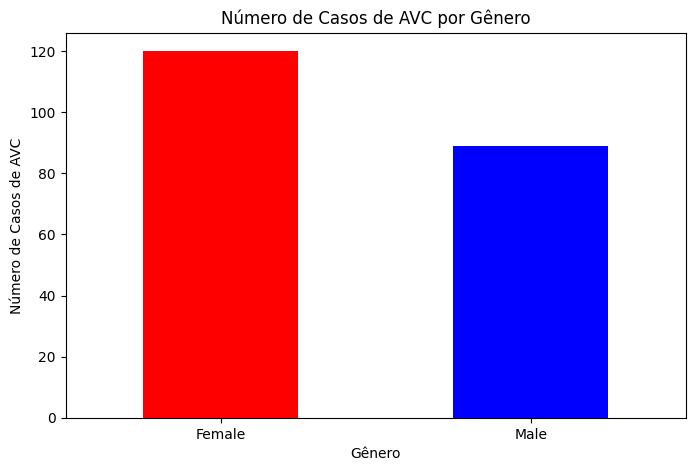

In [ ]:
show_dist_of('stroke', df_clean)

show_dist_of('hypertension', df_clean)

sns.boxplot(x='stroke', y='hypertension', data=df_clean)
plt.title('Relação do hypertension com o stroke')
plt.xlabel('Ocorrência de AVC')
plt.ylabel('Hipertensão')
plt.show()

# Agrupar os dados por gênero e contar o número de casos de AVC
stroke_by_gender = df_clean[df_clean['stroke'] == 1].groupby('gender').size()
# Criar um gráfico de barras
stroke_by_gender.plot(kind='bar', color=['red', 'blue' ], figsize=(8, 5))
plt.title('Número de Casos de AVC por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Casos de AVC')
plt.xticks(rotation=0)
plt.show()